In [75]:
%pylab inline
import gpipsfs
import poppy
poppy.conf.default_image_display_fov=2.8
import astropy.io.fits as fits

D =gpipsfs.GeminiPrimary.primary_diameter

Populating the interactive namespace from numpy and matplotlib


# Example Simulations of Coronagraphic Misalignments

Started 160921 during observing to assess some oddities seen with sat spots. 

Note, these are simulations of pure misalignments in GPI's coronagraphic components. **with no WFE at all**

The misalignments are **intentionally much larger than is expected in practice** to demonstrate the types of effects. 

In [87]:
def annotate_sats(psf, text=None):
    satll = psf[0].data[113,113]
    satur = psf[0].data[284,284]
    satul = psf[0].data[284,113]

    plt.gcf().text(0.7, 0.3, "Sat Spot Ratio LL/UR: {:.3f}\nSat Spot Ratio UL/UR: {:.3f}".format(satll/satur, satul/satur),
                  fontsize=12)
    
    if text is not None:
        plt.gcf().text(0.7, 0.4, text, fontsize=12)

    

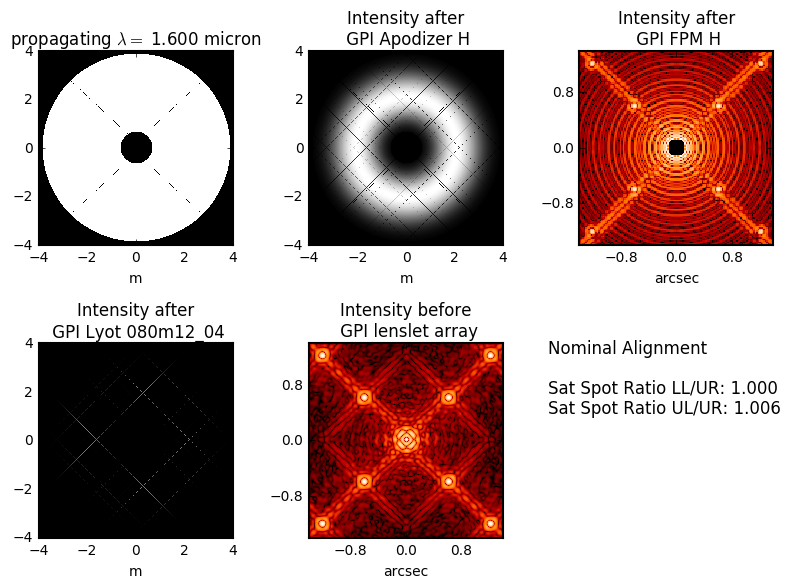

In [68]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()

plt.figure(figsize=(8,6))
psf_nominal = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
plt.tight_layout()
annotate_sats(psf_nominal, "Nominal Alignment")

plt.savefig("gpi_h_coron_nominal.png")

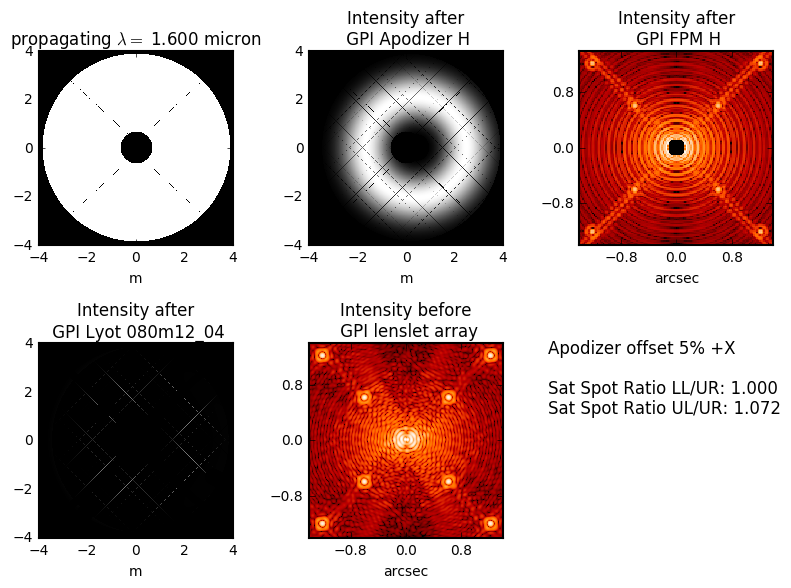

In [76]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()
osys.planes[1].shift_x = D/20


plt.figure(figsize=(8,6))
plt.subplots_adjust(top=0.8)
psfo = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
#plt.suptitle('Apodizer offset by 0.5 m projected on primary', fontsize=15)
plt.tight_layout()
annotate_sats(psfo, "Apodizer offset 5% +X")


plt.savefig("gpi_h_coron_apodizer_offset.png")

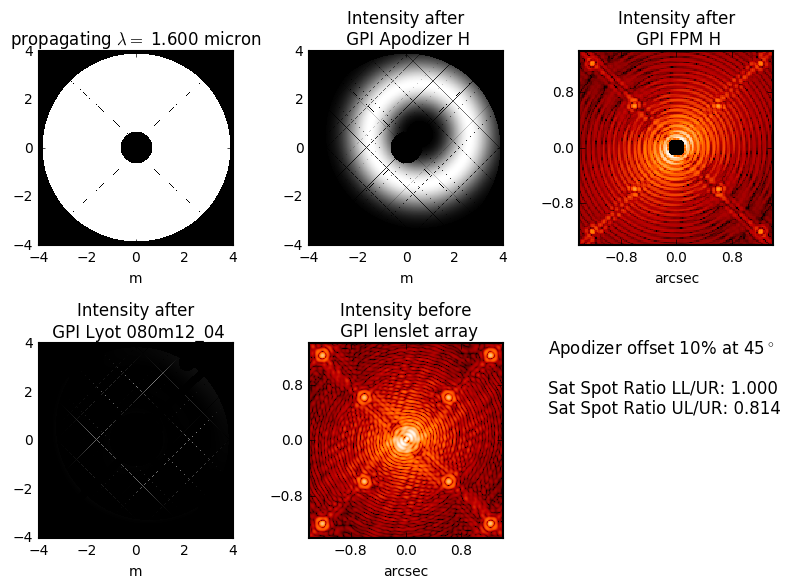

In [79]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()
osys.planes[1].shift_x = D/10/np.sqrt(2)
osys.planes[1].shift_y = D/10/np.sqrt(2)

plt.figure(figsize=(8,6))
plt.subplots_adjust(top=0.8)
psfo = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
#plt.suptitle('Apodizer offset by 0.5 m projected on primary', fontsize=15)

annotate_sats(psfo,"Apodizer offset 10% at 45$^\circ$")

plt.tight_layout()
plt.savefig("gpi_h_coron_apodizer_offset_45.png")

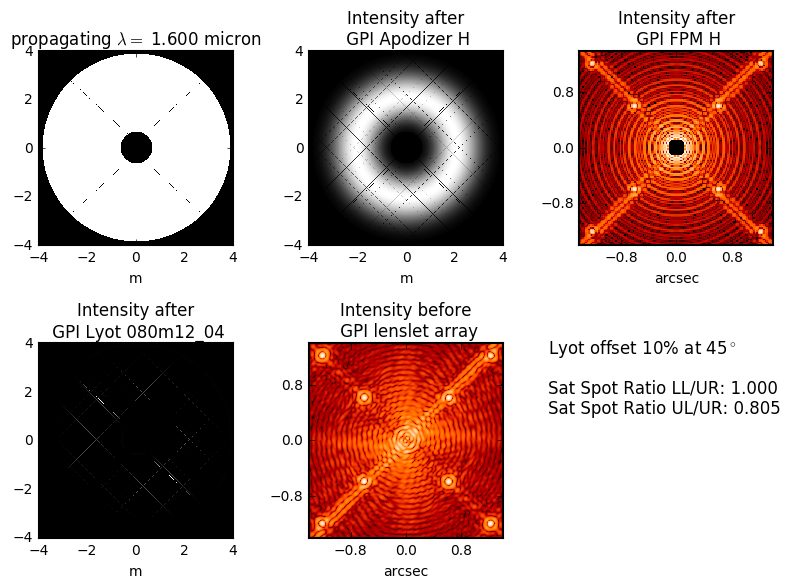

In [80]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()
osys.planes[3].shift_x = D/10/np.sqrt(2)
osys.planes[3].shift_y = D/10/np.sqrt(2)

plt.figure(figsize=(8,6))
plt.subplots_adjust(top=0.8)
psfo = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
#plt.suptitle('Apodizer offset by 0.5 m projected on primary', fontsize=15)

annotate_sats(psfo, "Lyot offset 10% at 45$^\circ$")

plt.tight_layout()
plt.savefig("gpi_h_coron_lyot_offset_45.png")

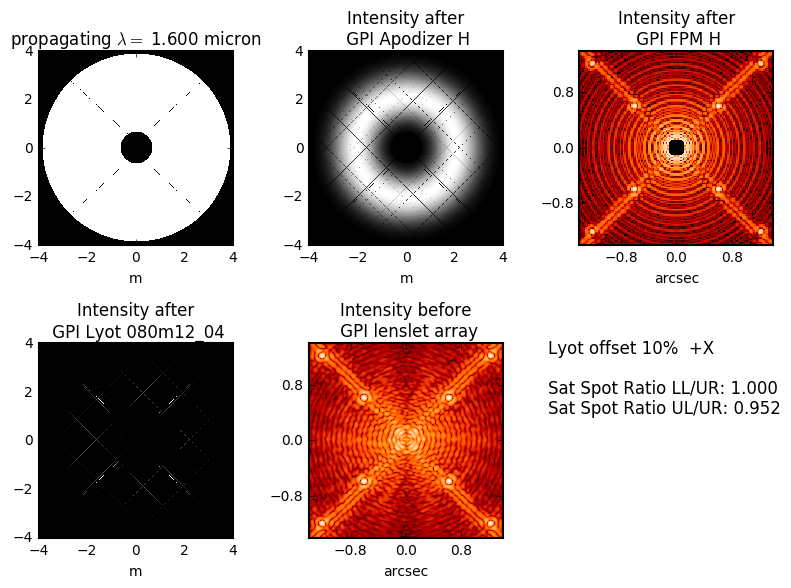

In [84]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()
osys.planes[3].shift_x =  D/10

plt.figure(figsize=(8,6))
plt.subplots_adjust(top=0.8)
psfo = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
#plt.suptitle('Apodizer offset by 0.5 m projected on primary', fontsize=15)

annotate_sats(psfo ,"Lyot offset 10%  +X")

plt.tight_layout()
plt.savefig("gpi_h_coron_lyot_offset_x.png")

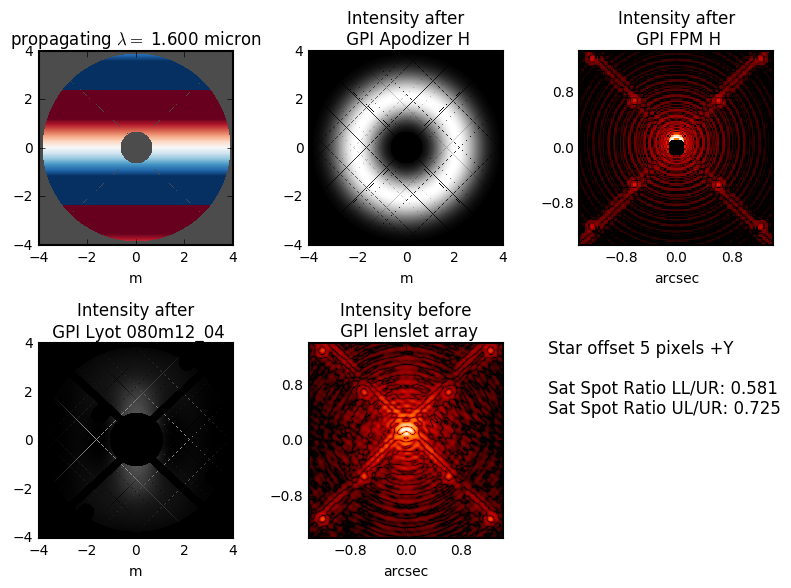

In [82]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()
#osys.planes[3].shift_x = 0.5
npix=5
osys.source_offset_r = 0.014*npix

plt.figure(figsize=(8,6))
plt.subplots_adjust(top=0.8)
psfo = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
#plt.suptitle('Apodizer offset by 0.5 m projected on primary', fontsize=15)

annotate_sats(psfo, "Star offset {} pixels +Y".format(npix))

plt.tight_layout()
plt.savefig("gpi_h_coron_star_offset_y.png")

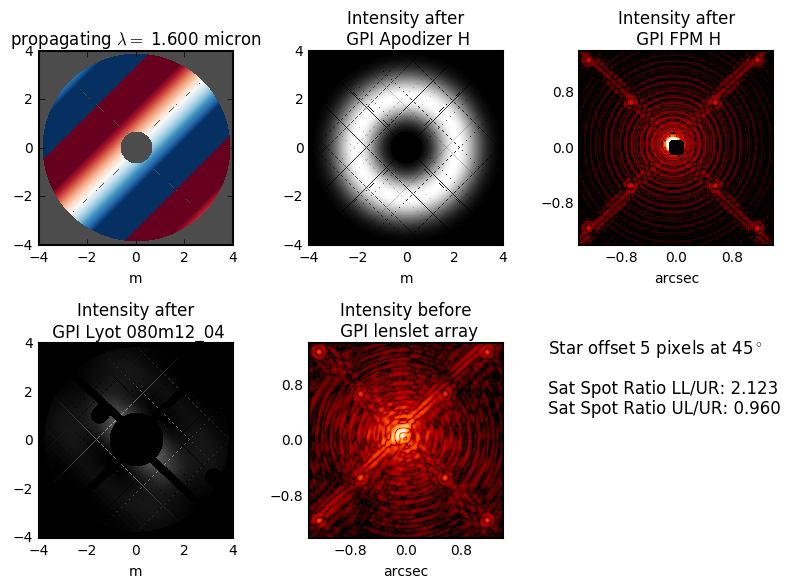

In [83]:
gpi=gpipsfs.GPI()
gpi.obsmode = 'H_coron'
osys = gpi._getOpticalSystem()
#osys.planes[3].shift_x = 0.5
npix=5
osys.source_offset_r = 0.014*npix
osys.source_offset_theta=45

plt.figure(figsize=(8,6))
plt.subplots_adjust(top=0.8)
psfo = osys.calc_psf(wavelength=1.6e-6, display_intermediates=True)
#plt.suptitle('Apodizer offset by 0.5 m projected on primary', fontsize=15)

annotate_sats(psfo, "Star offset {} pixels at 45$^\circ$".format(npix))

plt.tight_layout()
plt.savefig("gpi_h_coron_star_offset_45.png")